# Project for the Principles of Data Analytics Module
****

Spring/Summer 2024

By Sadie Concannon
G00411297

This notebook contains my analysis of the famous palmer penguins dataset.


****
# The Palmer Penguin dataset

The Palmer Penguin dataset is a collection of data about penguins in the Palmer Archipelgo, Antarctica. The dataset contains data gathered by Dr. Kristen Gorman at the Palmer Station, Antartica between 2007 and 2009 $ ^{1}$. It contains data for 344 penguins. There are three different species of penguins in this dataset (Adelie, Chinstrap and Gentoo), collected from the three islands in the Palmer Archipelago, Antarctica (Dream, Torgersen and Biscoe). The dataset also includes information on variables such as bill measurements, flipper measurements, body mass and sex. The dataset is often used for practicing classification algorithms and exploring data visualisation techniques.

In this project I look at the relationship between the features and variables of the penguins.

![penguins](https://www.gabemednick.com/post/penguin/featured_hu23a2ff6767279debab043a6c8f0a6157_878472_720x0_resize_lanczos_2.png)

****

## Importing Libraries and the Dataset

I will start by importing the necessary python libraries;

- Pandas: for storing, manipulating and working with structured data.
- Seaborn: a python data visualisation library based on matplotlib.
- Matplotlib: a plotting library.
- Numpy: for the computation and processing of the multidimensional and single dimensional array elements.

In [2]:
# for data frames
import pandas as pd
#Use seaborn library to access the penguins data set.
import seaborn as sns


#Loading the penguins data set.
penguins = sns.load_dataset('penguins')

# Importing the additional libraries:
import numpy as np
import matplotlib.pyplot as plt #for plotting
import sys


****
## Inspect the Dataset.

I studied the dataset first to get an overview of it before proceeding with my analysis of it. The Palmer Penguin dataset contains various types of variables that can be modeled using different data types.
1. **Categorical Variables:** The three species (Adelie, Chinstrap and Gentoo), island (Biscoe, Dream and Torgersen) and the sex (male, female).
2. **Numerical Variables:** Including quantitive measurements like bill length, bill depth, flipper length and body mass.

The Palmer Penguin package contains two datasets. A simplified version called *penguins* and raw dataset which contains all the variables collected. For this project I will be using the simplified version containig the variables as outlined above.

In [3]:
# Show to see the data frame
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
# Penguins.info() provides information on the dataset
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


We can see the data is tabular with each row corresponding to an observation. For each penguin we have a data point for its species, island, bill length, bill depth, flipper length, body mass and sex.

The numerical values for the lengths are in millimeters and in grams for the body mass.

In [5]:
# Look at first row.
penguins.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       Male
Name: 0, dtype: object

In [6]:
# Count the number of penguins of each sex.
penguins['sex'].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [7]:
# to determine the number of unique values in each column. We can see the number of variables under each column e.g we can see
# there are three islands and three species of penguin.
penguins.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

In [8]:
# a very simple command to describe the data in the data set is the describe() method, it provides most measures of quantitive 
# statistical analysis
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


****
## Cleansing the Dataset.

After inspecting the data I then cleansed the dataset. Effective data cleaning is a vital part of the data analytics process and is essential in data analysis because raw data can often contain errors, missing values, or outliers that can skew the results of the analysis. By cleansing the data, you ensure its accuracy, reliability and consistency which leads to more accurate and trustworthy insights and conclusions $ ^{3}$.

In [9]:
# Look for rows that have null values. Rows which return the value "True" have Null values
penguins.isna()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [10]:
# to determine the number of Null values in each column
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

After identifying the rows and columns with Null values I considered whether I should delete these or replace the missing values. Given the size of this dataset I opted to replace the missing values. I used imputation where the missing values are populated using a calculated value such as the mean values in a column.

In [11]:
# starting with bill length and finding the rows with missing values.
penguins[penguins['bill_length_mm'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [12]:
#check mean values for Adelie penguin first
adelie_penguin=penguins[(penguins['species']=='Adelie')&(penguins['island']=='Torgersen')]
adelie_penguin.mean()

C:\Users\daith\AppData\Local\Temp\ipykernel_23352\1769253334.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  adelie_penguin.mean()


bill_length_mm         38.950980
bill_depth_mm          18.429412
flipper_length_mm     191.196078
body_mass_g          3706.372549
dtype: float64

In [13]:
#check mean values for Gentoo penguin
gentoo_penguin=penguins[(penguins['species']=='Gentoo')&(penguins['island']=='Biscoe')]
gentoo_penguin.mean()

C:\Users\daith\AppData\Local\Temp\ipykernel_23352\3665241434.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gentoo_penguin.mean()


bill_length_mm         47.504878
bill_depth_mm          14.982114
flipper_length_mm     217.186992
body_mass_g          5076.016260
dtype: float64

In [14]:
#check mean values for Chinstrap penguin
chinstrap_penguin=penguins[penguins['species']=='Chinstrap']
chinstrap_penguin.mean()

C:\Users\daith\AppData\Local\Temp\ipykernel_23352\3994264153.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  chinstrap_penguin.mean()


bill_length_mm         48.833824
bill_depth_mm          18.420588
flipper_length_mm     195.823529
body_mass_g          3733.088235
dtype: float64

In [15]:
#fill in missing values for adelie and gentoo at rows 3 and 339, selecting sex randomly

penguins.iloc[3, 2:7] = 38.950980, 18.429412, 191.196078, 3706.372549, 'Female'
penguins.iloc[339, 2:7] = 47.504878, 14.982114, 217.186992, 5076.016260, 'Male'

In [16]:
# Check the rows with missing vaues in sex column
penguins[penguins['sex'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [17]:
# allocate sex based on body mass
penguins.iloc[336,6]='Male'
penguins.iloc[324,6]='Male'
penguins.iloc[286,6]='Male'
penguins.iloc[9,6]='Male'
penguins.iloc[246,6]='Male'
penguins.iloc[8,6]='Female'
penguins.iloc[10,6]='Female'
penguins.iloc[47,6]='Female'
penguins.iloc[11,6]='Female'

In [18]:
# Check values updated
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

There are no null values remaining. Now I will proceed to the analysis and visualisation of the data.
****

## Data Visualisation


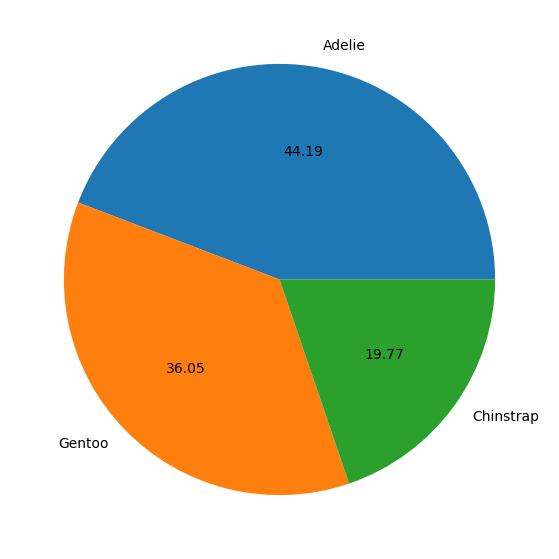

In [28]:
#Visualising the data using a pie chart

#First by Species

species = penguins['species'].value_counts()
plt.figure(figsize=(10,7))
plt.pie(data=species, x=species.values, labels=species.index, autopct='%.2f') #explode=(0.1,0.1,0.1))
plt.show()

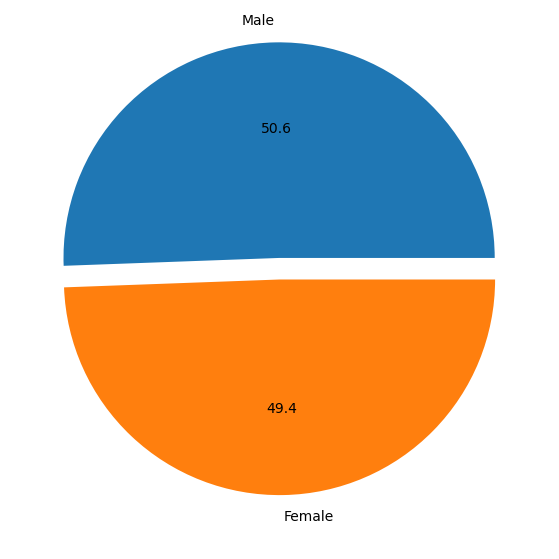

In [50]:
#By Sex

sex = penguins['sex'].value_counts()
plt.figure(figsize=(10,7))
plt.pie(data=sex, x=sex.values, labels=sex.index, autopct='%.1f', explode=(0.1,0))
plt.show()

(array([21., 35., 33., 34., 44., 55., 57., 39., 16., 10.]),
 array([13.1 , 13.94, 14.78, 15.62, 16.46, 17.3 , 18.14, 18.98, 19.82,
        20.66, 21.5 ]),
 <BarContainer object of 10 artists>)

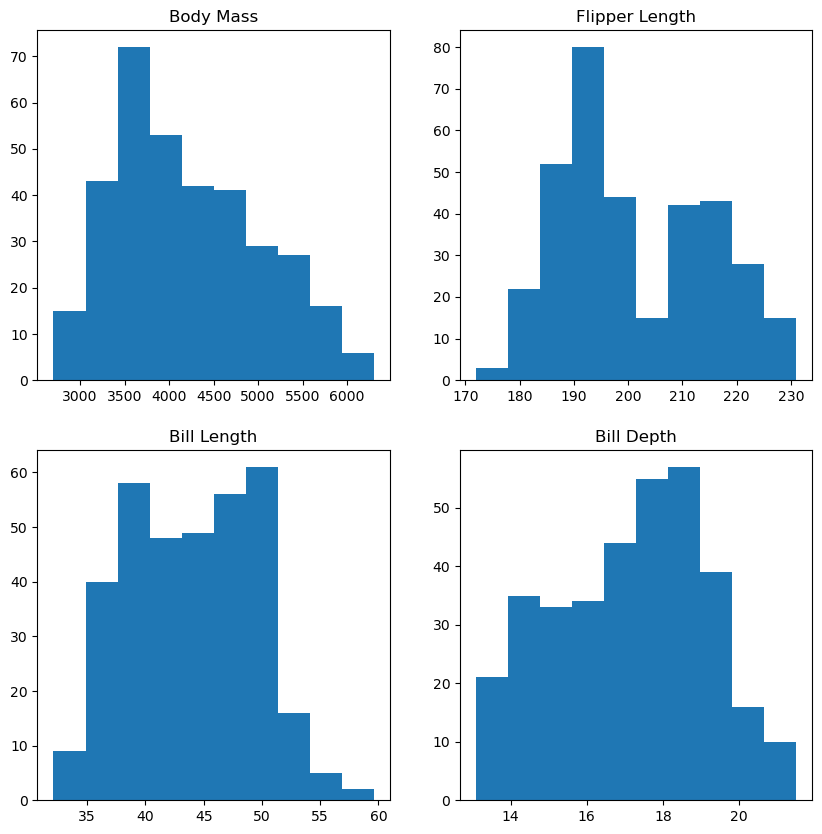

In [20]:
#initially I started with a simple histogram but amended to have 4 together for ease of comparison
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Body Mass")
axes[0,0].hist(penguins['body_mass_g'], bins=10)

axes[0,1].set_title("Flipper Length")
axes[0,1].hist(penguins['flipper_length_mm'], bins=10) 

axes[1,0].set_title("Bill Length")
axes[1,0].hist(penguins['bill_length_mm'], bins=10)

axes[1,1].set_title("Bill Depth")
axes[1,1].hist(penguins['bill_depth_mm'], bins=10)
#plt.show()

<AxesSubplot:xlabel='island'>

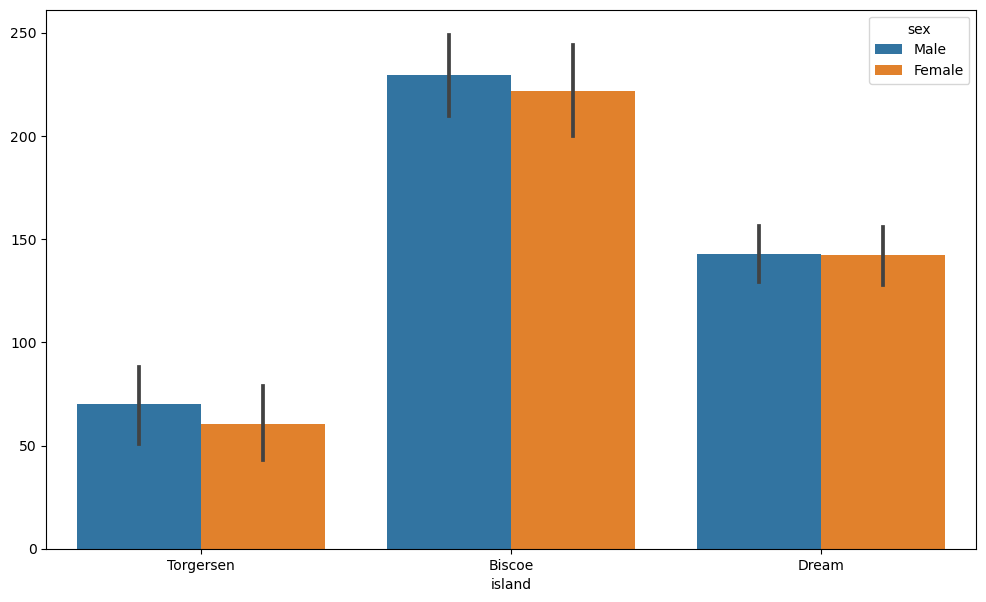

In [43]:
plt.figure(figsize=(12,7))
sns.barplot(data=penguins, x='island', y=penguins.island.index, hue='sex')

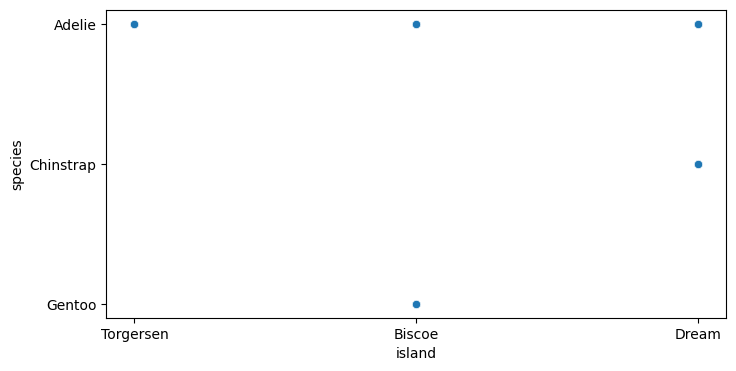

In [32]:
#scatterplot
f = plt.figure(figsize=(8,4))
fig = sns.scatterplot(x="island", y="species", data=penguins)

#### Pair Plot
****
A Pair plot visualises the data set of the determined variables to find the relationship between them. It combines the use of histograms and strip plots. In the example below I have selected four variables to compare using the command `vars` to specify them just for ease of visualisation given the large number of variable in my data set but these can all be plotted if desired and as shown in second pair plot below. I have added a regression line in red for ease of viewing.$ ^{2} $ 


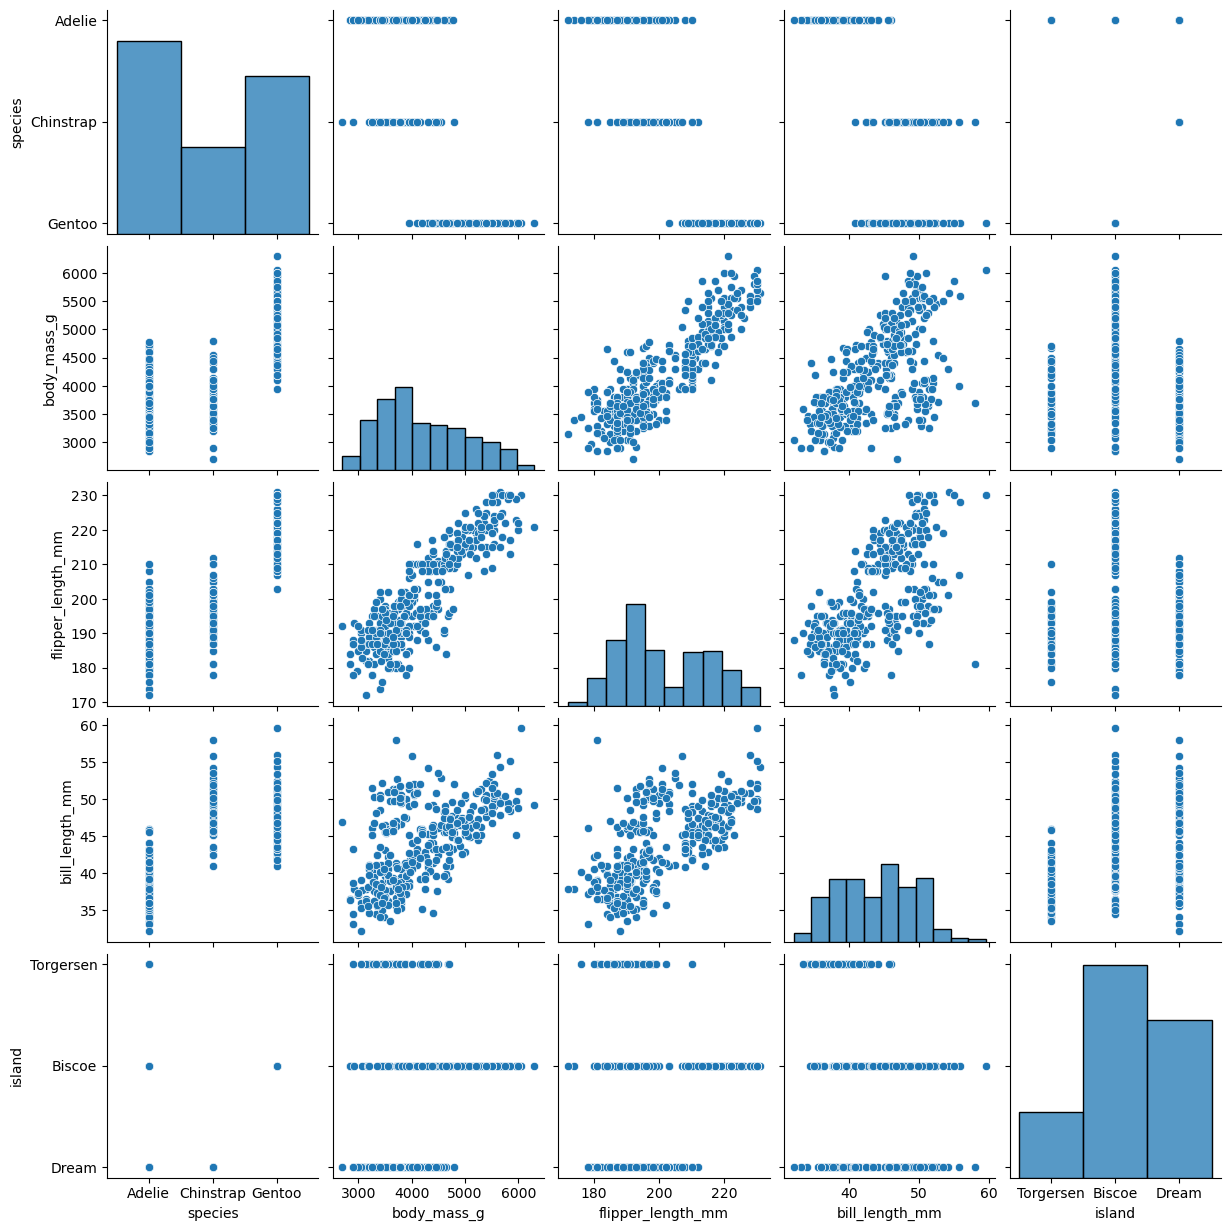

In [38]:
sns.pairplot(data=penguins, vars=['species', 'body_mass_g', 'flipper_length_mm', 'bill_length_mm', 'island'])

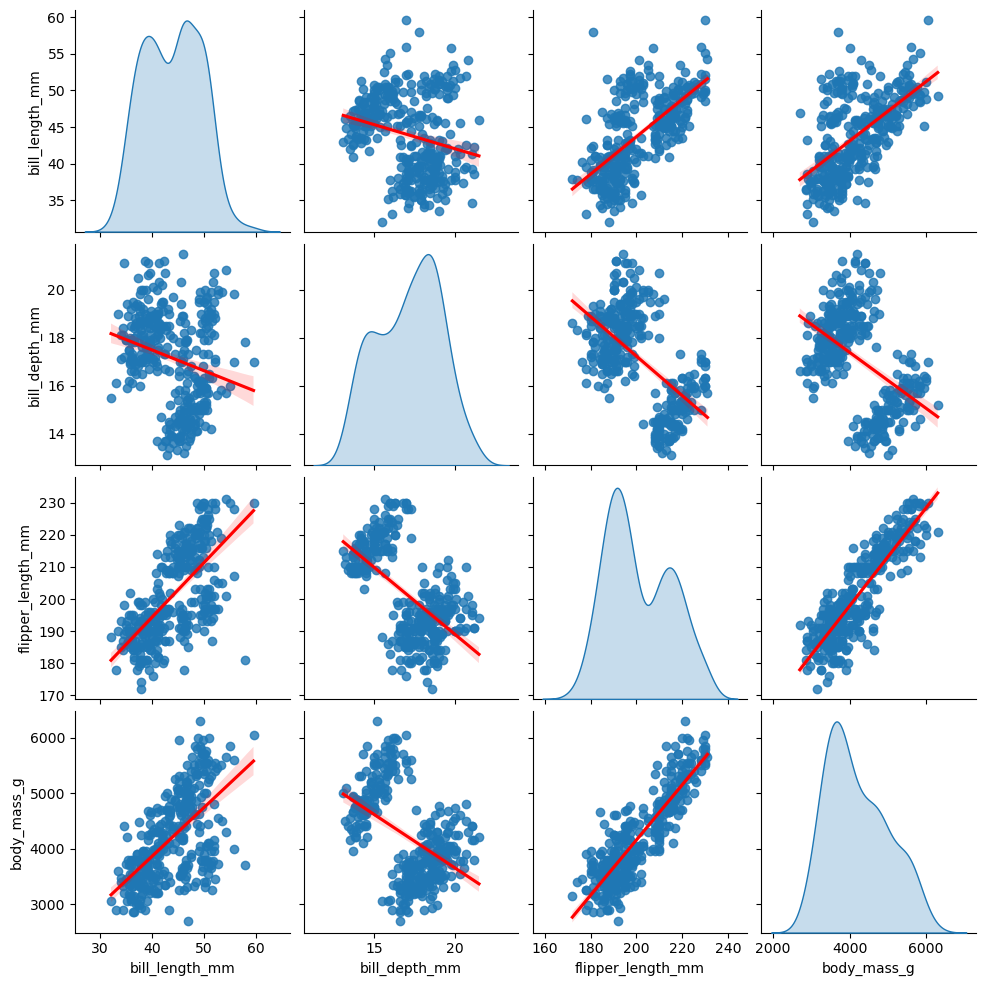

In [23]:
sns.pairplot(data=penguins, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})

#### __References__
*****

1. https://www.kaggle.com/code/florianspire/palmer-penguins-data-preprocessing-and-analysis
2. https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22
3. https://careerfoundry.com/en/blog/data-analytics/what-is-data-cleaning/

****
# End